<a href="https://colab.research.google.com/github/PriyaMurali16/PriyaMurali16/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io

In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving seattle-weather_2.csv to seattle-weather_2.csv


In [ ]:
nwd = pd.read_csv(io.BytesIO(uploaded_file['seattle-weather_2.csv']))

In [ ]:
nwd.head(n=10)

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,rain
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
5,1/6/2012,2.5,4.4,2.2,2.2,rain
6,1/7/2012,0.0,7.2,2.8,2.3,rain
7,1/8/2012,0.0,10.0,2.8,2.0,sun
8,1/9/2012,4.3,9.4,5.0,3.4,rain
9,1/10/2012,1.0,6.1,0.6,3.4,rain


In [ ]:
nwd.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [ ]:
nwd['weather'].value_counts()

rain     694
sun      640
fog      101
cloud     26
Name: weather, dtype: int64

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nwd.isnull().values.any()

False

In [ ]:
nwd['weather'] = nwd['weather'].map({'cloud' : 0, 'fog' : 1, 'rain' : 2, 'sun' : 3}).astype(int)

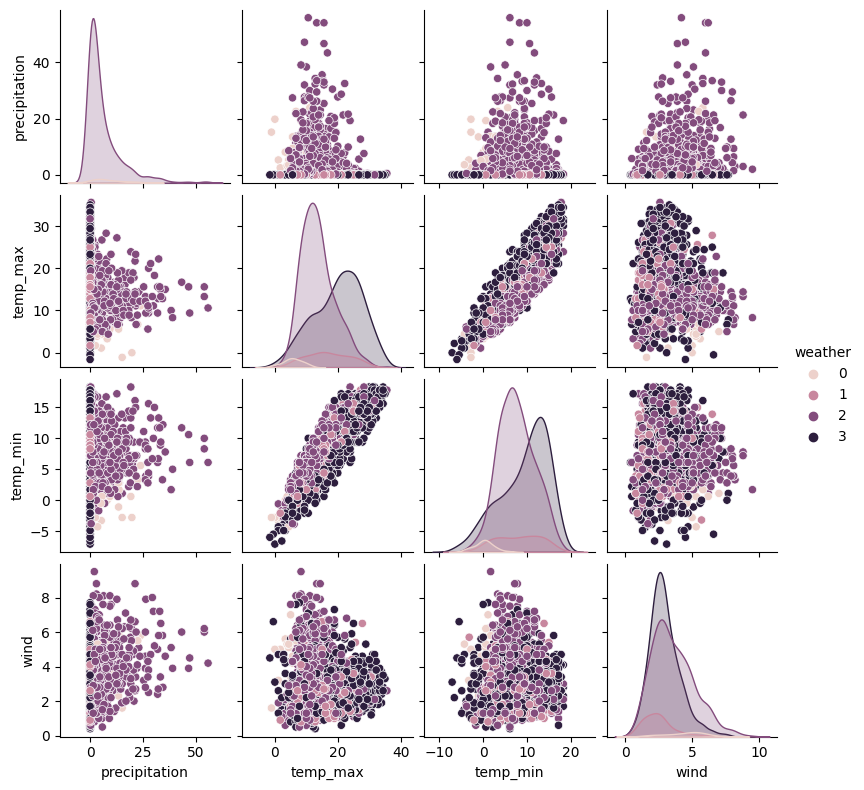

In [ ]:
plt.close()

sns.pairplot(nwd, hue = 'weather', height = 2)

plt.show()

In [ ]:
dep_data = nwd['weather']

idep_data = nwd.drop(['date', 'weather'], axis = 1)

In [ ]:
idep_data.head(n=5)

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [ ]:
data_scaling = preprocessing.MinMaxScaler()

idep_scaled = data_scaling.fit_transform(idep_data)

In [ ]:
scaled_data = pd.DataFrame(idep_scaled,columns = ['precipitation', 'temp_max', 'temp_min', 'wind'])

scaled_data.head(n=5)

,precipitation,temp_max,temp_min,wind
0,0.000000,0.387097,0.476378,0.472527
1,0.194991,0.327957,0.389764,0.450549
2,0.014311,0.357527,0.562992,0.208791
3,0.363148,0.370968,0.500000,0.472527
4,0.023256,0.282258,0.389764,0.626374


In [ ]:
seed= 123
idep_train, idep_test, dep_train, dep_test = train_test_split(scaled_data, dep_data, test_size = 0.2, random_state = seed)

In [ ]:
dep_test.value_counts()

2    144
3    123
1     22
0      4
Name: weather, dtype: int64

In [ ]:
k_neighbors_model = KNeighborsClassifier()

k_neighbors = k_neighbors_model.fit(idep_train,dep_train)

dep_predict = k_neighbors.predict(idep_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

c_m = confusion_matrix(dep_test, dep_predict)

print("Confusion Matrix : \n", c_m)

Confusion Matrix : 
 [[  3   0   1   0]
 [  0   3   8  11]
 [  0   2 114  28]
 [  0   7  25  91]]


In [ ]:
accuracy = accuracy_score(dep_test, dep_predict)

print("Accuracy of the classifier : ", round(accuracy,4), "or" ,round((accuracy * 100),3),"%")

Accuracy of the classifier :  0.7201 or 72.014 %


[Text(0.5, 1.0, 'Confusion Matrix'),
 Text(0.5, 23.52222222222222, 'Actual'),
 Text(50.722222222222214, 0.5, 'Predicted')]

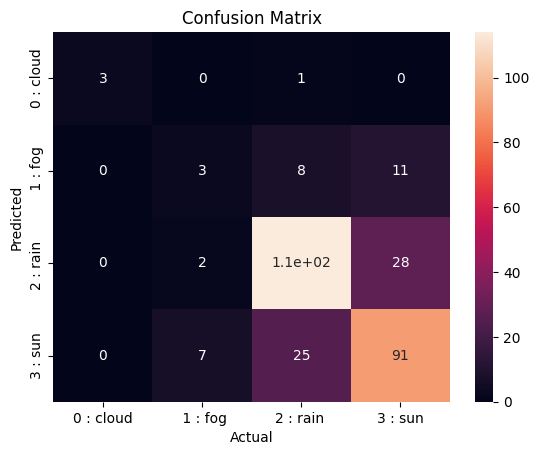

In [ ]:
xaxis_labels = ['0 : cloud', ' 1 : fog', '2 : rain ', '3 : sun']
yaxis_labels = ['0 : cloud', ' 1 : fog', '2 : rain ', '3 : sun']

heat_map = sns.heatmap(c_m, annot = True, xticklabels=xaxis_labels, yticklabels=yaxis_labels)

heat_map.set(title = 'Confusion Matrix', xlabel = 'Actual', ylabel = 'Predicted')

Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
k_neighbors_model_tuned = KNeighborsClassifier()

size_of_leaf = list(range(1,25))
neighbors_number = list(range(1,15))
metric = [1,2]

parameters = dict(leaf_size = size_of_leaf, n_neighbors = neighbors_number, p = metric)

grid_search = GridSearchCV(k_neighbors_model_tuned, parameters, cv = 15)


In [ ]:
print("The optimal leaf size : ", grid_search.best_estimator_.get_params()['leaf_size'])
print("The optimal number of neighbors : ", grid_search.best_estimator_.get_params()['n_neighbors'])
print("The optimal metric : ", grid_search.best_estimator_.get_params()['p'])

The optimal leaf size :  1
The optimal number of neighbors :  14
The optimal metric :  1


In [ ]:
tuned_fit = grid_search.fit(idep_train,dep_train)
tunes_prediction = grid_search.predict(idep_test)

In [ ]:
tuned_accuracy = accuracy_score(dep_test, tunes_prediction)
print("Accuracy of the classifier after tuning : ", round(tuned_accuracy,4), "or" ,round((tuned_accuracy * 100),3),"%")

Accuracy of the classifier after tuning :  0.7474 or 74.744 %


In [ ]:
accuracy_data = [['PreTuning',round(accuracy*100)],['PostTuning',round(tuned_accuracy*100)]]
table_accuracies = pd.DataFrame(accuracy_data,columns = ['Pre/Post','Accuracy'] )

In [ ]:
table_accuracies.head()

,Pre/Post,Accuracy
0,PreTuning,72
1,PostTuning,75


In [ ]:
import plotly.express as px

fig = px.bar(table_accuracies, x = 'Pre/Post', y ='Accuracy', title = "Accuracy pre and post tuning")

fig.show()

In [ ]:
differential_table = pd.DataFrame({'Actual_data': [dep_data]})